In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [214]:
data = pd.read_csv('Desktop/STUDIA/Magisterka/data_csv_files/to_analyse/New/mixed_toAnalyse.csv')
data.head(500)

,Person_Id,First_Digit_Chi_Square,Second_Digit_Chi_Square,First_Digit_Smirnov,Second_Digit_Smirnov,First_Digit_M2,Second_Digit_M2,First_Digit_M3,Second_Digit_M3,Z_1_1,...,Z_2_5,Z_2_6,Z_2_7,Z_2_8,Z_2_9,First_Digit_Correlation_Coefficient,Second_Digit_Correlation_Coefficient,Transaction_Counter,Activity_Time,Is_Fraudulent
0,6ef6a730-cb96-4500-bf74-6325487694ef,4.14,6.53,0.44,0.37,0.26,0.29,0.77,0.91,0.80,...,-1.12,0.51,1.55,-1.56,0.00,1.00,0.79,734,635,False
1,3d6ef581-3ab4-4e7d-a4db-12e0ebaff583,14.49,10.54,0.68,0.51,0.33,0.34,1.00,1.09,-0.82,...,-1.96,-0.82,2.15,0.00,0.49,0.99,0.78,857,803,False
2,763b0d3b-1913-4d72-8f47-3677a59cedd8,25.89,12.46,0.69,0.83,0.50,0.37,1.49,1.18,1.56,...,0.44,-0.90,1.93,0.34,0.81,0.99,0.72,942,1068,False
3,a894f694-9b00-486d-a103-e587f05259aa,19.48,5.83,0.52,0.45,0.28,0.24,0.84,0.76,-0.07,...,-0.54,-1.32,1.45,0.68,0.23,0.99,0.77,974,620,False
4,f78aa83b-5e67-4ddf-9666-41c92b7d76d0,13.45,7.58,0.22,0.36,0.21,0.24,0.63,0.77,-0.19,...,0.58,0.79,-0.30,-2.12,0.82,0.99,0.81,1225,896,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ad3612fc-6315-4c7e-8bbb-71dc647b2091,107.97,24.41,2.07,0.93,0.64,0.38,1.91,1.21,-1.92,...,4.29,-0.50,-0.60,1.12,-0.17,0.99,0.84,1676,521,True
496,6116b4f9-ca16-4bdc-b577-bc15ba48437e,42.07,24.23,1.57,0.89,0.58,0.47,1.73,1.50,-2.08,...,4.15,-0.32,-0.43,1.30,-1.32,0.99,0.84,1058,431,True
497,a2f8c654-ad32-4a32-b84c-50d3ea70a6d9,153.88,27.96,2.67,0.86,0.68,0.32,2.05,1.02,-3.50,...,3.60,1.07,-1.22,-1.37,-0.69,0.99,0.83,2671,719,True
498,be051166-38eb-4dec-903e-e185898d9727,98.07,21.66,2.01,0.83,0.52,0.27,1.56,0.87,-3.80,...,2.60,-0.38,-0.90,-0.58,-0.85,0.99,0.83,2965,694,True


In [215]:
data.shape

(500, 33)

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Person_Id                             500 non-null    object 
 1   First_Digit_Chi_Square                500 non-null    float64
 2   Second_Digit_Chi_Square               500 non-null    float64
 3   First_Digit_Smirnov                   500 non-null    float64
 4   Second_Digit_Smirnov                  500 non-null    float64
 5   First_Digit_M2                        500 non-null    float64
 6   Second_Digit_M2                       500 non-null    float64
 7   First_Digit_M3                        500 non-null    float64
 8   Second_Digit_M3                       500 non-null    float64
 9   Z_1_1                                 500 non-null    float64
 10  Z_1_2                                 500 non-null    float64
 11  Z_1_3              

# Zamieniamy Is_Fraudulent na wartość numeryczną

In [217]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data.loc[:,['Is_Fraudulent']] = \
data.loc[:,['Is_Fraudulent']].apply(enc.fit_transform)
data.head()

,Person_Id,First_Digit_Chi_Square,Second_Digit_Chi_Square,First_Digit_Smirnov,Second_Digit_Smirnov,First_Digit_M2,Second_Digit_M2,First_Digit_M3,Second_Digit_M3,Z_1_1,...,Z_2_5,Z_2_6,Z_2_7,Z_2_8,Z_2_9,First_Digit_Correlation_Coefficient,Second_Digit_Correlation_Coefficient,Transaction_Counter,Activity_Time,Is_Fraudulent
0,6ef6a730-cb96-4500-bf74-6325487694ef,4.14,6.53,0.44,0.37,0.26,0.29,0.77,0.91,0.80,...,-1.12,0.51,1.55,-1.56,0.00,1.00,0.79,734,635,0
1,3d6ef581-3ab4-4e7d-a4db-12e0ebaff583,14.49,10.54,0.68,0.51,0.33,0.34,1.00,1.09,-0.82,...,-1.96,-0.82,2.15,0.00,0.49,0.99,0.78,857,803,0
2,763b0d3b-1913-4d72-8f47-3677a59cedd8,25.89,12.46,0.69,0.83,0.50,0.37,1.49,1.18,1.56,...,0.44,-0.90,1.93,0.34,0.81,0.99,0.72,942,1068,0
3,a894f694-9b00-486d-a103-e587f05259aa,19.48,5.83,0.52,0.45,0.28,0.24,0.84,0.76,-0.07,...,-0.54,-1.32,1.45,0.68,0.23,0.99,0.77,974,620,0
4,f78aa83b-5e67-4ddf-9666-41c92b7d76d0,13.45,7.58,0.22,0.36,0.21,0.24,0.63,0.77,-0.19,...,0.58,0.79,-0.30,-2.12,0.82,0.99,0.81,1225,896,0


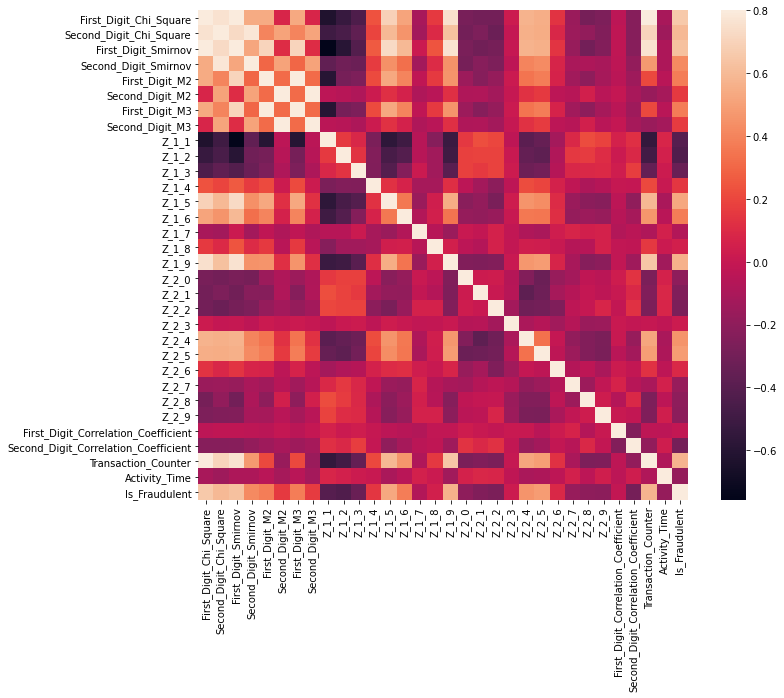

In [218]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [219]:
#del data['Second_Digit_M2']
#del data['Second_Digit_M3']
#del data['Z_1_4']
#del data['Z_1_7']
#del data['Z_1_8']
#del data['Z_2_2']
#del data['Z_2_3']
#del data['Z_2_6']
#del data['Z_2_7']
#del data['First_Digit_Correlation_Coefficient']

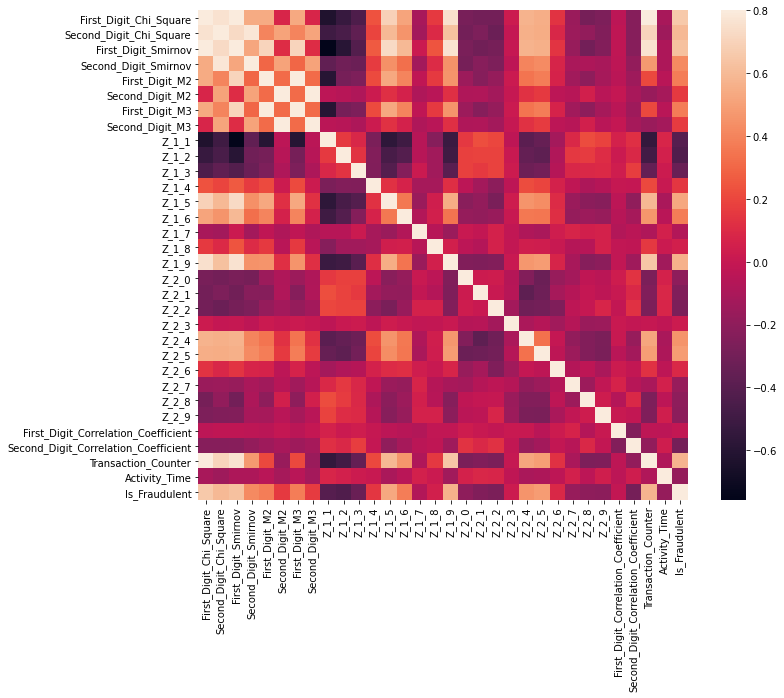

In [220]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

# x to wszystkie kolumny poza ID i isFraudulent, 

# y to pojedyncza kolumna ze zmienną wyjściową (Is_fraudulent)

In [221]:
x = data.iloc[:,1:-1]
y = data.Is_Fraudulent
x.head()

,First_Digit_Chi_Square,Second_Digit_Chi_Square,First_Digit_Smirnov,Second_Digit_Smirnov,First_Digit_M2,Second_Digit_M2,First_Digit_M3,Second_Digit_M3,Z_1_1,Z_1_2,...,Z_2_4,Z_2_5,Z_2_6,Z_2_7,Z_2_8,Z_2_9,First_Digit_Correlation_Coefficient,Second_Digit_Correlation_Coefficient,Transaction_Counter,Activity_Time
0,4.14,6.53,0.44,0.37,0.26,0.29,0.77,0.91,0.80,0.00,...,0.49,-1.12,0.51,1.55,-1.56,0.00,1.00,0.79,734,635
1,14.49,10.54,0.68,0.51,0.33,0.34,1.00,1.09,-0.82,-1.52,...,-0.68,-1.96,-0.82,2.15,0.00,0.49,0.99,0.78,857,803
2,25.89,12.46,0.69,0.83,0.50,0.37,1.49,1.18,1.56,0.68,...,0.22,0.44,-0.90,1.93,0.34,0.81,0.99,0.72,942,1068
3,19.48,5.83,0.52,0.45,0.28,0.24,0.84,0.76,-0.07,-1.43,...,0.64,-0.54,-1.32,1.45,0.68,0.23,0.99,0.77,974,620
4,13.45,7.58,0.22,0.36,0.21,0.24,0.63,0.77,-0.19,0.30,...,0.29,0.58,0.79,-0.30,-2.12,0.82,0.99,0.81,1225,896


# Podział na zbiór trenujący i testowy

In [222]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = \
train_test_split(x,y,test_size=0.3,random_state=10)

# Używamy RandomForestClassifier/LR jako modelu, uczymy i przewidujemy. Przed dodatkową selekcją predyktorów i SMOTE

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

print("KNeigborsClassifier\n")
print(accuracy_score(y_test,y_predict))
#pd.crosstab(y_test, y_predict)
confusion_matrix(y_test, y_predict)

KNeigborsClassifier

0.9466666666666667


array([[140,   2],
       [  6,   2]], dtype=int64)

In [224]:
test_set_correctly_classified = y_predict == y_test;
df_predictions_test = y_test.copy()
df_predictions_test["correct_prediction"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_predict
#df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0: "unknown", 1: "fraudulent"})
print(df_predictions_test["correct_prediction"].to_string())

151     True
424     True
154     True
190     True
131     True
310     True
266     True
495    False
157     True
282     True
452    False
152     True
164     True
219     True
351     True
433     True
43      True
47      True
467     True
208     True
398     True
437     True
474    False
236     True
368     True
129     True
230     True
345     True
163     True
336     True
193     True
482    False
408     True
485     True
100     True
176     True
218     True
116     True
278     True
280     True
98      True
390     True
114     True
276     True
24      True
91      True
400     True
65      True
119     True
498    False
339     True
301     True
411     True
300     True
302     True
111     True
287     True
7       True
139     True
108     True
102     True
72      True
414     True
327     True
174     True
291     True
481    False
269     True
240     True
222     True
442     True
475    False
60      True
183     True
6       True
238     True
304     True

In [225]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

print("Random forest\n")
print(accuracy_score(y_test,y_predict))
#pd.crosstab(y_test, y_predict)
confusion_matrix(y_test, y_predict)

Random forest

0.9466666666666667


array([[139,   3],
       [  5,   3]], dtype=int64)

In [226]:
test_set_correctly_classified = y_predict == y_test;
df_predictions_test = y_test.copy()
df_predictions_test["correct_prediction"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_predict
#df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0: "unknown", 1: "fraudulent"})
print(df_predictions_test["correct_prediction"].to_string())

151     True
424     True
154     True
190     True
131     True
310     True
266     True
495     True
157     True
282     True
452    False
152     True
164     True
219     True
351     True
433     True
43      True
47      True
467     True
208     True
398     True
437     True
474    False
236     True
368     True
129     True
230     True
345     True
163     True
336     True
193     True
482    False
408     True
485     True
100     True
176     True
218     True
116     True
278     True
280     True
98      True
390     True
114     True
276     True
24      True
91      True
400     True
65      True
119     True
498    False
339     True
301     True
411     True
300     True
302     True
111     True
287     True
7       True
139     True
108     True
102     True
72      True
414     True
327     True
174     True
291     True
481    False
269     True
240     True
222     True
442     True
475     True
60      True
183     True
6       True
238     True
304     True

In [227]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

print("Logistic regression\n")
print(accuracy_score(y_test,y_predict))
#pd.crosstab(y_test, y_predict)
confusion_matrix(y_test, y_predict)

Logistic regression

0.9266666666666666


array([[139,   3],
       [  8,   0]], dtype=int64)

In [228]:
test_set_correctly_classified = y_predict == y_test;
df_predictions_test = y_test.copy()
df_predictions_test["correct_prediction"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_predict
#df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0: "unknown", 1: "fraudulent"})
print(df_predictions_test["correct_prediction"].to_string())

151     True
424     True
154     True
190     True
131     True
310     True
266     True
495    False
157     True
282     True
452    False
152     True
164     True
219     True
351     True
433     True
43      True
47      True
467    False
208     True
398     True
437     True
474     True
236     True
368     True
129     True
230     True
345     True
163     True
336     True
193     True
482    False
408     True
485    False
100     True
176     True
218     True
116     True
278     True
280     True
98      True
390     True
114     True
276     True
24      True
91      True
400     True
65      True
119     True
498    False
339     True
301     True
411     True
300     True
302     True
111     True
287     True
7       True
139     True
108     True
102     True
72      True
414     True
327     True
174     True
291     True
481    False
269     True
240     True
222     True
442     True
475    False
60      True
183     True
6       True
238     True
304     True

In [229]:
model = MLPClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

print("Neural network - MLP classifier\n")
print(accuracy_score(y_test,y_predict))
#pd.crosstab(y_test, y_predict)
confusion_matrix(y_test, y_predict)

Neural network - MLP classifier

0.9466666666666667


array([[142,   0],
       [  8,   0]], dtype=int64)

# SMOTE - balansujemy zbiór

In [230]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
from collections import Counter
print("Przed balansowaniem SMOTE :" , Counter(y_train))
print("Po balansowaniu SMOTE :" , Counter(y_train_smote))

Przed balansowaniem SMOTE : Counter({0: 333, 1: 17})
Po balansowaniu SMOTE : Counter({0: 333, 1: 333})


# i ponownie sprawdzamy skuteczność

In [231]:
model = KNeighborsClassifier()
model.fit(x_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print("AFTER SMOTE KNeighborsClassifier\n")
print(accuracy_score(y_test,y_predict))
#pd.crosstab(y_test, y_predict)
confusion_matrix(y_test, y_predict)

AFTER SMOTE KNeighborsClassifier

0.8333333333333334


array([[119,  23],
       [  2,   6]], dtype=int64)

In [232]:
model = RandomForestClassifier()
model.fit(x_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
print("AFTER SMOTE random forest\n")
#pd.crosstab(y_test, y_predict)
confusion_matrix(y_test, y_predict)

0.9866666666666667
AFTER SMOTE random forest



array([[141,   1],
       [  1,   7]], dtype=int64)

In [233]:
test_set_correctly_classified = y_predict == y_test;
df_predictions_test = y_test.copy()
df_predictions_test["correct_prediction"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_predict
#df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0: "unknown", 1: "fraudulent"})
print(df_predictions_test["correct_prediction"].to_string())

151     True
424     True
154     True
190     True
131     True
310     True
266     True
495     True
157     True
282     True
452     True
152     True
164     True
219     True
351     True
433     True
43      True
47      True
467     True
208     True
398     True
437     True
474    False
236     True
368     True
129     True
230     True
345     True
163     True
336     True
193     True
482     True
408     True
485     True
100     True
176     True
218     True
116     True
278     True
280     True
98      True
390     True
114     True
276     True
24      True
91      True
400     True
65      True
119     True
498     True
339     True
301     True
411     True
300     True
302     True
111     True
287     True
7       True
139     True
108     True
102     True
72      True
414     True
327     True
174     True
291     True
481    False
269     True
240     True
222     True
442     True
475     True
60      True
183     True
6       True
238     True
304     True

In [234]:
model = LogisticRegression()
model.fit(x_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print("AFTER SMOTE logistic regression\n")
print(accuracy_score(y_test,y_predict))
#pd.crosstab(y_test, y_predict)
confusion_matrix(y_test, y_predict)

AFTER SMOTE logistic regression

0.96


array([[139,   3],
       [  3,   5]], dtype=int64)

In [235]:
test_set_correctly_classified = y_predict == y_test;
df_predictions_test = y_test.copy()
df_predictions_test["correct_prediction"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_predict
#df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0: "unknown", 1: "fraudulent"})
print(df_predictions_test["correct_prediction"].to_string())

151     True
424     True
154     True
190     True
131     True
310     True
266     True
495     True
157     True
282     True
452    False
152     True
164     True
219     True
351     True
433     True
43      True
47      True
467    False
208     True
398     True
437     True
474     True
236     True
368     True
129     True
230     True
345     True
163     True
336     True
193     True
482    False
408     True
485     True
100     True
176     True
218     True
116     True
278     True
280     True
98      True
390     True
114     True
276     True
24      True
91      True
400     True
65      True
119     True
498     True
339     True
301     True
411     True
300     True
302     True
111     True
287     True
7       True
139     True
108     True
102     True
72      True
414     True
327     True
174     True
291     True
481    False
269     True
240     True
222     True
442     True
475     True
60      True
183     True
6       True
238     True
304     True

In [236]:
model = MLPClassifier()
model.fit(x_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print("AFTER SMOTE Neural network - MLP classifier\n")
print(accuracy_score(y_test,y_predict))
#pd.crosstab(y_test, y_predict)
confusion_matrix(y_test, y_predict)

AFTER SMOTE Neural network - MLP classifier

0.9266666666666666


array([[137,   5],
       [  6,   2]], dtype=int64)

In [237]:
test_set_correctly_classified = y_predict == y_test;
df_predictions_test = y_test.copy()
df_predictions_test["correct_prediction"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_predict
#df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0: "unknown", 1: "fraudulent"})
print(df_predictions_test["correct_prediction"].to_string())

151     True
424     True
154     True
190     True
131     True
310     True
266     True
495     True
157     True
282     True
452    False
152     True
164     True
219     True
351     True
433     True
43      True
47      True
467    False
208     True
398     True
437     True
474    False
236     True
368     True
129     True
230     True
345     True
163     True
336     True
193     True
482    False
408     True
485    False
100     True
176     True
218     True
116     True
278     True
280     True
98      True
390     True
114     True
276     True
24      True
91      True
400     True
65      True
119     True
498    False
339     True
301     True
411     True
300     True
302     True
111     True
287     True
7       True
139     True
108     True
102     True
72      True
414     True
327     True
174     True
291     True
481    False
269     True
240     True
222     True
442     True
475     True
60      True
183     True
6       True
238     True
304     True